In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

df = pd.read_csv('/content/drive/MyDrive/data/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [ ]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


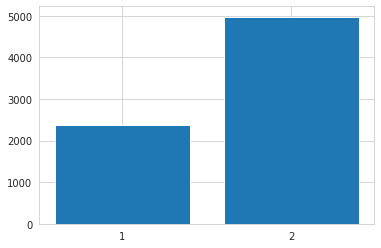

In [ ]:
# 강아지, 고양이 숫자
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.show()

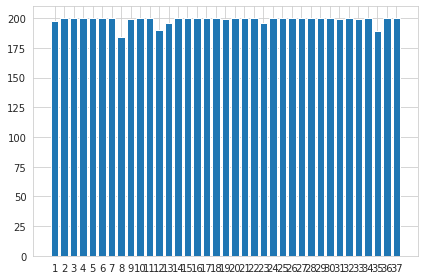

In [ ]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

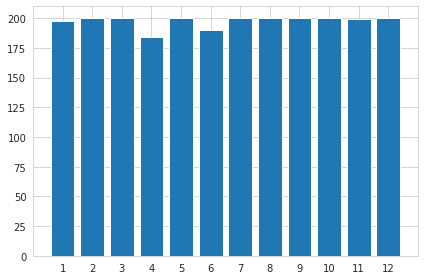

In [ ]:
# 고양이 종류
value_counts = df[df['species'] == 1]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

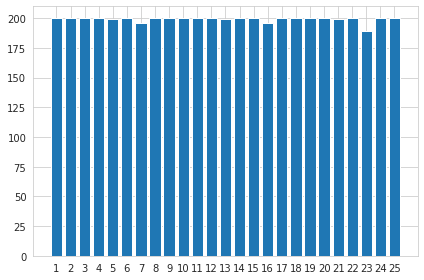

In [ ]:
# 강아지 종류
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

segmantation map -> 검정색(trimaps 형태),
bounding box -> 이미지파일로 저장되어 있지 않음

In [ ]:
import os
from glob import glob

In [ ]:
image_dir = '/content/drive/MyDrive/data/images/'
bbox_dir = '/content/drive/MyDrive/data/annotations/xmls/'
seg_dir = '/content/drive/MyDrive/data/annotations/trimaps/'

In [ ]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [ ]:
image_files[:10]

['/content/drive/MyDrive/data/images/Sphynx_212.jpg',
 '/content/drive/MyDrive/data/images/leonberger_93.jpg',
 '/content/drive/MyDrive/data/images/miniature_pinscher_174.jpg',
 '/content/drive/MyDrive/data/images/japanese_chin_2.jpg',
 '/content/drive/MyDrive/data/images/great_pyrenees_11.jpg',
 '/content/drive/MyDrive/data/images/pug_193.jpg',
 '/content/drive/MyDrive/data/images/boxer_41.jpg',
 '/content/drive/MyDrive/data/images/chihuahua_135.jpg',
 '/content/drive/MyDrive/data/images/boxer_167.jpg',
 '/content/drive/MyDrive/data/images/pug_42.jpg']

In [ ]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

7390

In [ ]:
seg_files[:10]

['/content/drive/MyDrive/data/annotations/trimaps/samoyed_154.png',
 '/content/drive/MyDrive/data/annotations/trimaps/havanese_41.png',
 '/content/drive/MyDrive/data/annotations/trimaps/Russian_Blue_106.png',
 '/content/drive/MyDrive/data/annotations/trimaps/British_Shorthair_278.png',
 '/content/drive/MyDrive/data/annotations/trimaps/Persian_131.png',
 '/content/drive/MyDrive/data/annotations/trimaps/pomeranian_67.png',
 '/content/drive/MyDrive/data/annotations/trimaps/yorkshire_terrier_61.png',
 '/content/drive/MyDrive/data/annotations/trimaps/leonberger_35.png',
 '/content/drive/MyDrive/data/annotations/trimaps/British_Shorthair_127.png',
 '/content/drive/MyDrive/data/annotations/trimaps/miniature_pinscher_13.png']

In [ ]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [ ]:
bbox_files[:10]

['/content/drive/MyDrive/data/annotations/xmls/miniature_pinscher_156.xml',
 '/content/drive/MyDrive/data/annotations/xmls/keeshond_15.xml',
 '/content/drive/MyDrive/data/annotations/xmls/keeshond_120.xml',
 '/content/drive/MyDrive/data/annotations/xmls/miniature_pinscher_11.xml',
 '/content/drive/MyDrive/data/annotations/xmls/leonberger_132.xml',
 '/content/drive/MyDrive/data/annotations/xmls/newfoundland_14.xml',
 '/content/drive/MyDrive/data/annotations/xmls/keeshond_115.xml',
 '/content/drive/MyDrive/data/annotations/xmls/keeshond_167.xml',
 '/content/drive/MyDrive/data/annotations/xmls/leonberger_144.xml',
 '/content/drive/MyDrive/data/annotations/xmls/miniature_pinscher_119.xml']

In [ ]:
import cv2
import xml.etree.ElementTree as et # xml 파일 파싱
from matplotlib.patches import Rectangle # 바운딩 박스 그리기

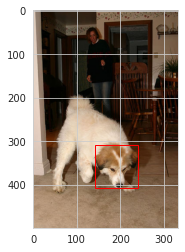

In [ ]:
# 바운딩 박스 정보파악
image_path = image_files[11]
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR -> RGB

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show()

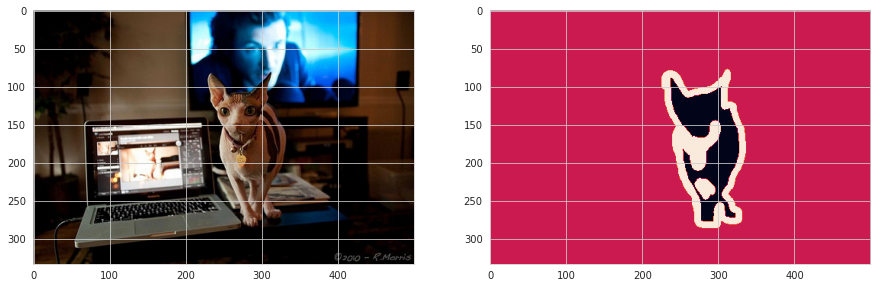

In [ ]:
# segmantation map 정보파악
image_path = image_files[110]
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)

plt.show()

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# KFold split
kf = KFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [ ]:
print(len(df[df['fold'] == 1]))
print(len(df[df['fold'] != 1]))

1470
5879


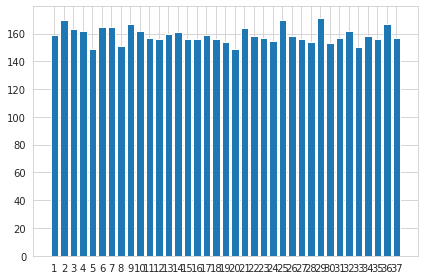

In [ ]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

split 시 분포 균등화

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


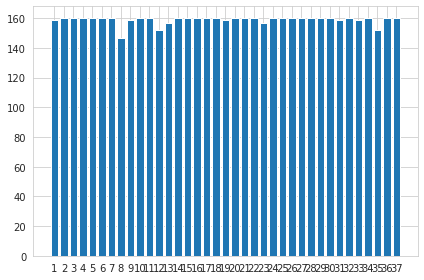

In [ ]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/data/kfolds.csv', index=False)